In [12]:
nums = [3, 2, 5, 6, 7, 9, 0, 8]

def is_even(n):
    return n % 2 == 0

evens = list(filter(lambda n: n%2 == 0, nums))
print(evens)

doubles = list(map(lambda n: n * 2, evens))
print(doubles)

from functools import reduce

def add_all(a, b):
    return a+b

sum = reduce(lambda a, b: a + b, doubles)
print(sum)

[2, 6, 0, 8]
[4, 12, 0, 16]
32


### ggplot

In [13]:
from plotnine import *
import pandas as pd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings('ignore')

#print(mpl.__version__)
#print(mpl.__file__)
#print(mpl.get_configdir())
#print(mpl.get_cachedir)
#print(mpl.matplotlib_fname())
#print(plt.rcParams['font.serif'])
#print(plt.rcParams['font.sans-serif'])
#print(plt.rcParams['font.monospace'])
#font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
#[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

mpl.rcParams['axes.unicode_minus'] = False

In [15]:
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [7]:
dat = pd.DataFrame([['lunch', 14.89], ['dinner', 17.23]], columns=['time', 'total_bill'])

In [ ]:
(ggplot(dat)
 + aes(x='time', y='total_bill', fill='time')
 + geom_bar(color='black', fill='#008888', width=0.8, stat='identity')
 + guides(fill=False)
 + xlab('식사구분')
 + ylab('지불총액')
 + ggtitle('평균 지불액')
 + theme(text=element_text('NanumBarunGothic'))
)

In [14]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumBarunGothic', 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicUltraLight.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicLight.ttf'),
 ('NanumBarunGothic', 'C:\\WINDOWS\\Fonts\\NanumBarunGothicBold.ttf')]

## loading R data 

In [32]:
from  rpy2.robjects  import  r,  pandas2ri
pandas2ri.activate()
r.data('tips')

r.data('tips', package='reshape2')

r['tips']

In [34]:
tips = r['tips']

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
(ggplot(tips)
 + aes(x='day')
 + geom_bar(stat='count')
 + xlab('날짜')
 + ylab('횟수')
 + theme(text=element_text('NanumBarunGothic'))
)

c:\users\hotak\appdata\local\programs\python\python36\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
c:\users\hotak\appdata\local\programs\python\python36\lib\site-packages\plotnine\layer.py:517: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  return not cbook.iterable(value) and (cbook.is_numlike(value) or


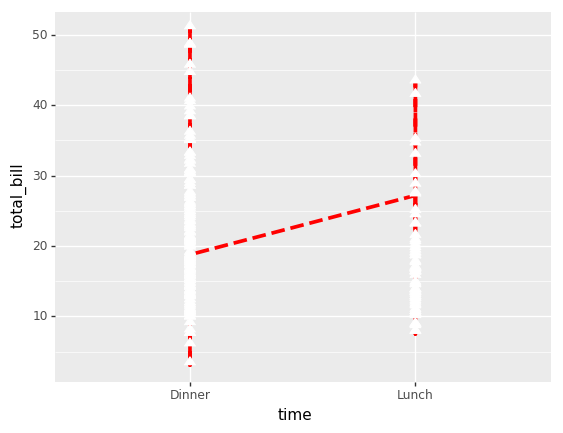

<ggplot: (111669581558)>

In [48]:
(ggplot(tips)
 + aes(x='time', y='total_bill', group=1)
 + geom_line(color='red', linetype='dashed', size=1.5)
 + geom_point(color='blue', size=4, shape=10, fill='white')
)

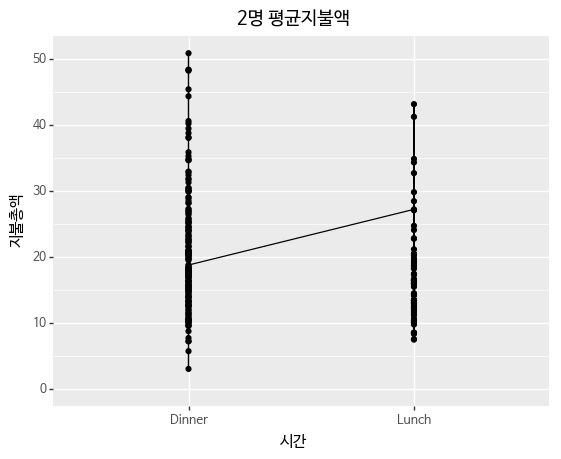

<ggplot: (111678993216)>

In [101]:
(ggplot(tips)
 + aes(x='time', y='total_bill', group=0)
 + geom_line()
 + geom_point()
 + expand_limits(y=0)
 + xlab('시간')
 + ylab('지불총액')
 + ggtitle('2명 평균지불액')
 + theme(text=element_text('NanumBarunGothic'))
)

In [53]:
tims.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [80]:
sex = pd.Series(['Female', 'Female', 'Male','Male'])
time = pd.Series(['lunch', 'dinner', 'lunch', 'dinner'])
total_bill = pd.Series([13.53, 16.81, 16.24, 17.42])
dat1 = pd.DataFrame([sex, time, total_bill], index=['sex','time','total_bill'])

In [82]:
dat1 = dat1.transpose()

In [115]:
dat1

,sex,time,total_bill
0,Female,lunch,13.53
1,Female,dinner,16.81
2,Male,lunch,16.24
3,Male,dinner,17.42


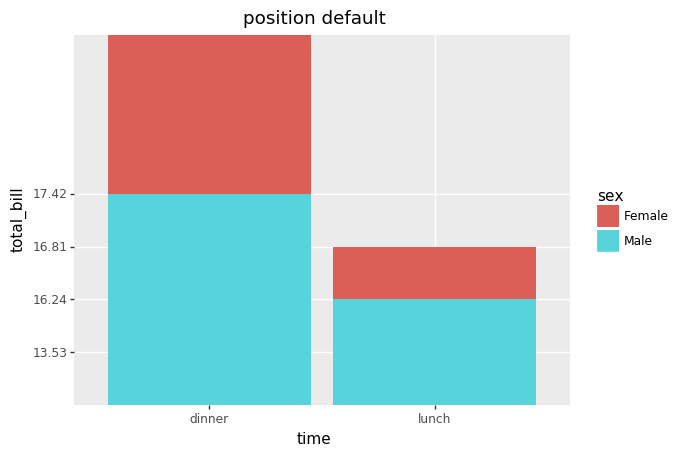

<ggplot: (111677771093)> 

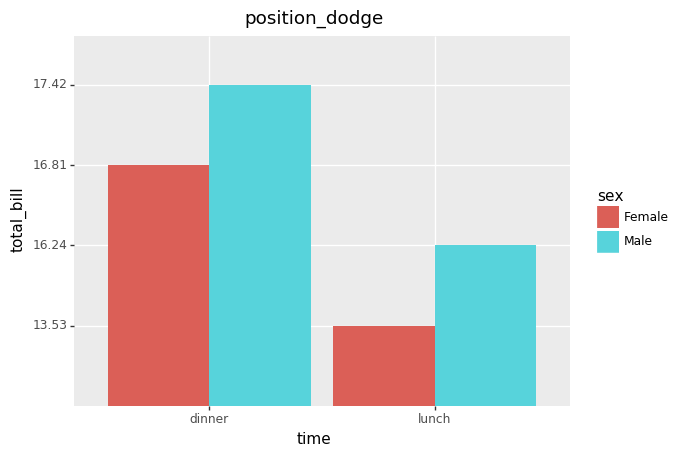

<ggplot: (-9223371925176739661)>


In [91]:
g1 = ggplot(dat1)\
 + aes(x='time', y='total_bill', fill='sex')\
 + geom_bar(stat='identity')\
 + ggtitle('position default')

g2 = ggplot(dat1)\
 + aes(x='time', y='total_bill', fill='sex')\
 + geom_bar(stat='identity', position=position_dodge())\
 + ggtitle('position_dodge')

print(g1, g2)

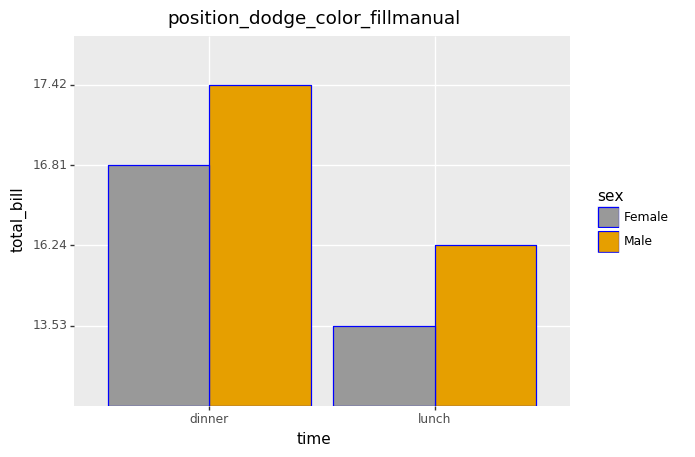

<ggplot: (111678308872)>

In [94]:
(ggplot(dat1)
 + aes(x='time', y='total_bill', fill='sex')
 + geom_bar(stat='identity', position=position_dodge(), color='blue')
 + ggtitle('position_dodge_color_fillmanual bar fill color')
 + scale_fill_manual(values=['#999999','#e69f00'])
)

#### line graph

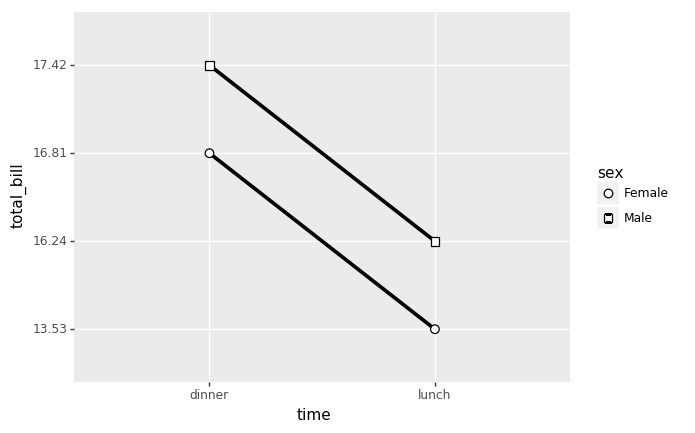

<ggplot: (-9223371925174378664)>


In [114]:
g1 = ggplot(dat1) + aes(x='time', y='total_bill', group='sex')\
 + geom_line()\
 + geom_point()\

g2 = ggplot(dat1) + aes(x='time', y='total_bill', group='sex', color='sex')\
+ geom_line()\
+ geom_point()

g3 = ggplot(dat1) + aes(x='time', y='total_bill', group='sex', shape='sex')\
+ geom_line(size=1.5)\
+ geom_point(size=3, fill='white')\
+ scale_shape_manual(values=['o', 's'])

print(g3)

### session 2

In [2]:
from rpy2.robjects import r, pandas2ri
from plotnine import *
import pandas as pd
import warnings

pandas2ri.activate()
warnings.filterwarnings('ignore')

In [3]:
r.data('midwest', package='ggplot2')

'midwest'


In [4]:
# conver R dataframe to pandas datafrme
midwest = pandas2ri.ri2py(r['midwest'])

In [6]:
midwest.columns

Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category'],
      dtype='object')

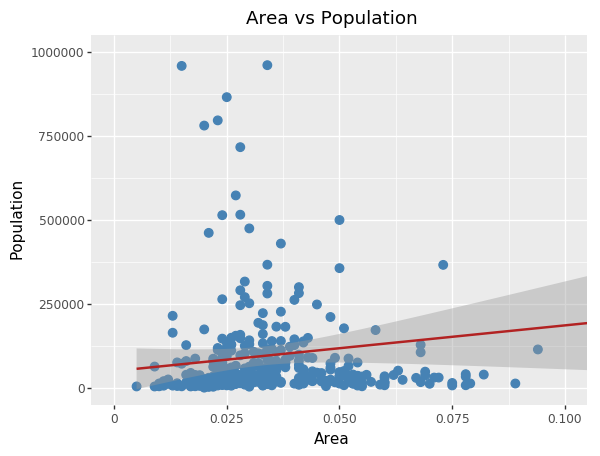

<ggplot: (159915486177)>

In [19]:
(ggplot(midwest)
 + aes(x='area', y='poptotal')
 + geom_point(color='steelblue', size=3)
 + geom_smooth(method='lm', color='firebrick')
 + coord_cartesian(xlim=(0, 0.1), ylim=(0, 1000000))
 + ggtitle('Area vs Population') + xlab('Area') + ylab('Population')
)

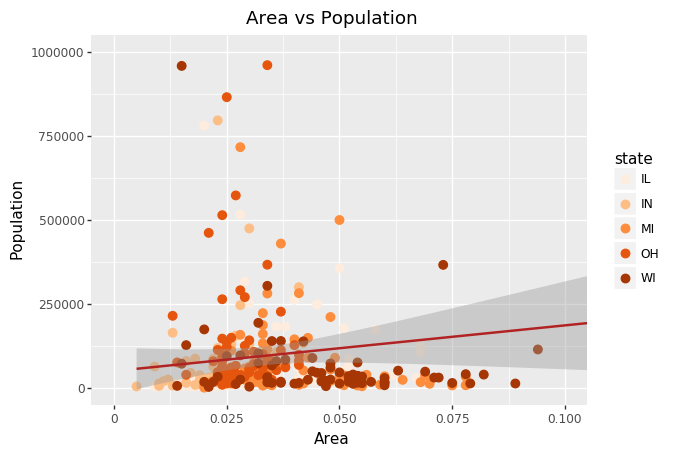

<ggplot: (-9223371876937755034)>

In [32]:
(ggplot(midwest)
 + aes(x='area', y='poptotal',color='state')
 + geom_point(size=3)
 + geom_smooth(method='lm', color='firebrick')
 + coord_cartesian(xlim=(0, 0.1), ylim=(0, 1000000))
 + ggtitle('Area vs Population') + xlab('Area') + ylab('Population')
 + scale_color_brewer(palette='Oranges')
)

In [28]:
theme?

Init signature: theme(complete=False, **kwargs)
Docstring:     
This is a base class for themes.

In general, only complete themes should subclass this class.

Parameters
-----------
complete : bool
    Themes that are complete will override any existing themes.
    themes that are not complete (ie. partial) will add to or
    override specific elements of the current theme. e.g::

        theme_gray() + theme_xkcd()

    will be completely determined by :class:`theme_xkcd`, but::

        theme_gray() + theme(axis_text_x=element_text(angle=45))

    will only modify the x-axis text.

kwargs: dict
    kwargs are themeables. The themeables are elements that
    are subclasses of `themeable`. Many themeables are defined
    using theme elements i.e

        - :class:`element_line`
        - :class:`element_rect`
        - :class:`element_text`

    These simply bind together all the aspects of a themeable
    that can be themed. See
    :class:`~plotnine.themes.themeable.themeable`.

Not